# Librerias

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import json

# 1. Cargar y Explorar el Dataset

In [51]:
df = pd.read_csv('..\\data\\raw\\Atletas_y_ParaAtletas_apoyados_20250203.csv')

In [52]:
df.head()

,ID,Tipo_Atleta,sexo,Deporte,Rango_Edad,Organización_deportiva,Subregión_nacimiento,Municipio_nacimiento,Año,Mes,Permanencia
0,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,1,Activo
1,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,10,Activo
2,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,11,Activo
3,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,12,Activo
4,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,2,Activo


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      60000 non-null  int64 
 1   Tipo_Atleta             60000 non-null  object
 2   sexo                    60000 non-null  object
 3   Deporte                 60000 non-null  object
 4   Rango_Edad              60000 non-null  object
 5   Organización_deportiva  60000 non-null  object
 6   Subregión_nacimiento    60000 non-null  object
 7   Municipio_nacimiento    60000 non-null  object
 8   Año                     60000 non-null  int64 
 9   Mes                     60000 non-null  int64 
 10  Permanencia             60000 non-null  object
dtypes: int64(3), object(8)
memory usage: 5.0+ MB


Vemos que tenemos 60000 registros y 11 columnas, sin datos nulos

Observamos que no hay valores nulos

In [54]:
df.describe(include='all')

,ID,Tipo_Atleta,sexo,Deporte,Rango_Edad,Organización_deportiva,Subregión_nacimiento,Municipio_nacimiento,Año,Mes,Permanencia
count,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000.000000,60000.000000,60000
unique,NaN,2,2,74,14,47,10,96,NaN,NaN,2
top,NaN,Atletas convencionales,Hombre,Atletismo,20-24,Liga de Atletismo de Antioquia,Valle de Aburrá,Medellín,NaN,NaN,Activo
freq,NaN,47951,35768,4047,20973,4047,33761,27875,NaN,NaN,53815
mean,5.295777e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.500000,6.492967,NaN
std,5.662602e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500004,3.392857,NaN
min,1.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,1.000000,NaN
25%,1.297670e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,4.000000,NaN
50%,1.303400e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.500000,7.000000,NaN
75%,1.303390e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,9.000000,NaN


# 2. Distribución General de los Atletas

## Por tipo de atleta: ¿Cuántos son atletas vs. paraatletas?

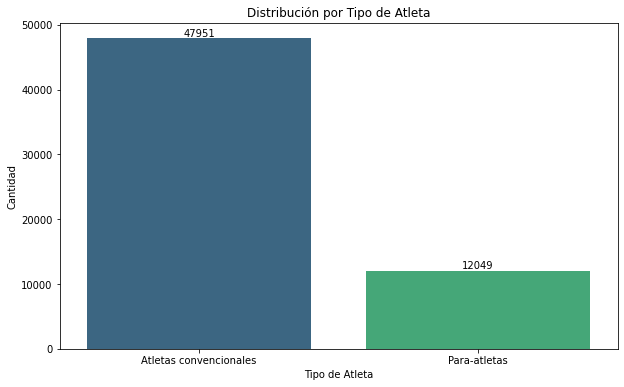

In [55]:
# Contar la cantidad de atletas y para-atletas
tipo_atleta_counts = df['Tipo_Atleta'].value_counts()

# Graficar la distribución con valores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tipo_atleta_counts.index, y=tipo_atleta_counts.values, palette='viridis')
plt.title('Distribución por Tipo de Atleta')
plt.xlabel('Tipo de Atleta')
plt.ylabel('Cantidad')

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

In [56]:
# Calcular porcentajes para tipo de atleta
tipo_atleta_percent = tipo_atleta_counts / tipo_atleta_counts.sum() * 100
print(tipo_atleta_percent)

Atletas convencionales    79.918333
Para-atletas              20.081667
Name: Tipo_Atleta, dtype: float64


## Por género: ¿Cuántos hombres y mujeres han sido apoyados?

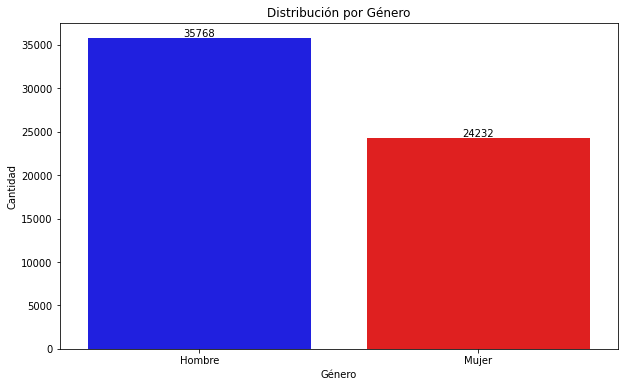

In [57]:
# Contar la cantidad de hombres y mujeres
genero_counts = df['sexo'].value_counts()

# Graficar la distribución con valores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=genero_counts.index, y=genero_counts.values, palette=['blue', 'red'])
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

In [58]:
# Calcular porcentajes para género
genero_percent = genero_counts / genero_counts.sum() * 100
print(genero_percent)

Hombre    59.613333
Mujer     40.386667
Name: sexo, dtype: float64


## Por deporte: ¿Cuáles son los deportes más y menos apoyados?

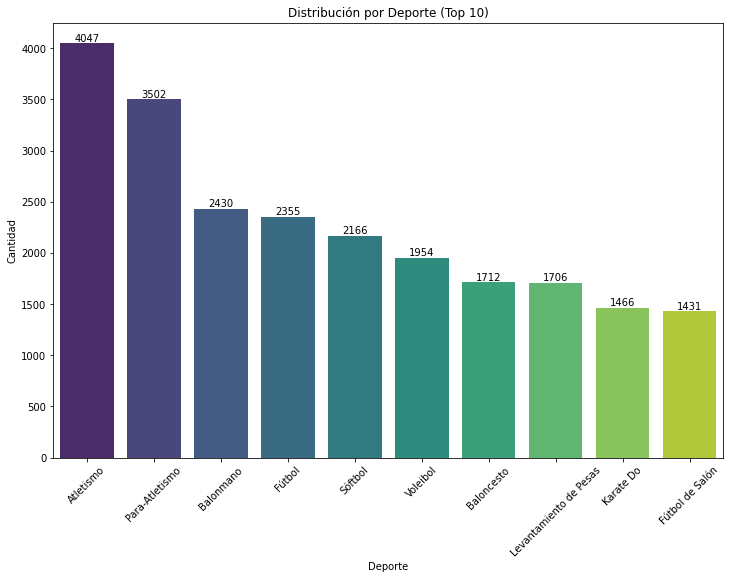

In [59]:
# Contar la cantidad de atletas por deporte
deporte_counts = df['Deporte'].value_counts()

# Seleccionar los 10 deportes más apoyados
top_deportes = deporte_counts.head(10)

# Graficar la distribución con valores
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_deportes.index, y=top_deportes.values, palette='viridis')
plt.title('Distribución por Deporte (Top 10)')
plt.xlabel('Deporte')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

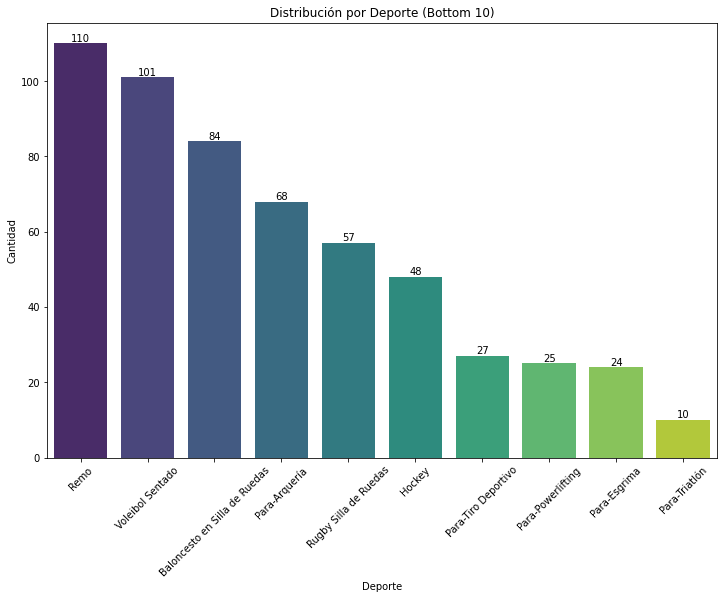

In [60]:
# Seleccionar los 10 deportes menos apoyados
bottom_deportes = deporte_counts.tail(10)

# Graficar la distribución con valores
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bottom_deportes.index, y=bottom_deportes.values, palette='viridis')
plt.title('Distribución por Deporte (Bottom 10)')
plt.xlabel('Deporte')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

In [61]:
# Mostrar los deportes más y menos apoyados
deporte_mas_apoyado = deporte_counts.idxmax()
deporte_menos_apoyado = deporte_counts.idxmin()
print(f"Deporte más apoyado: {deporte_mas_apoyado} con {deporte_counts.max()} atletas")
print(f"Deporte menos apoyado: {deporte_menos_apoyado} con {deporte_counts.min()} atletas")

Deporte más apoyado: Atletismo con 4047 atletas
Deporte menos apoyado: Para-Triatlón con 10 atletas


## Por organización deportiva: ¿Cuáles concentran más atletas?


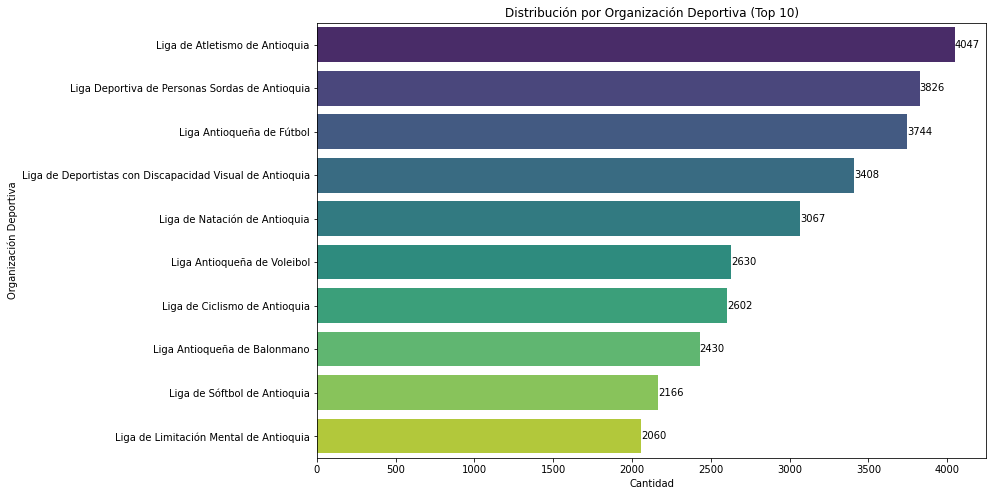

In [62]:
# Contar la cantidad de atletas por organización deportiva
organizacion_counts = df['Organización_deportiva'].value_counts()

# Seleccionar las 10 organizaciones con más atletas
top_organizaciones = organizacion_counts.head(10)

# Graficar la distribución con valores
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_organizaciones.values, y=top_organizaciones.index, palette='viridis')
plt.title('Distribución por Organización Deportiva (Top 10)')
plt.xlabel('Cantidad')
plt.ylabel('Organización Deportiva')

# Añadir los valores al lado de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()


# 3. Análisis Temporal

## Evolución del número de atletas apoyados por año.

In [63]:
# Contar el número de atletas por año
atletas_por_anio = df.groupby("Año")["ID"].count().reset_index()

# Renombrar columna para mayor claridad
atletas_por_anio.rename(columns={"ID": "total_atletas"}, inplace=True)

atletas_por_anio

,Año,total_atletas
0,2021,30000
1,2022,30000


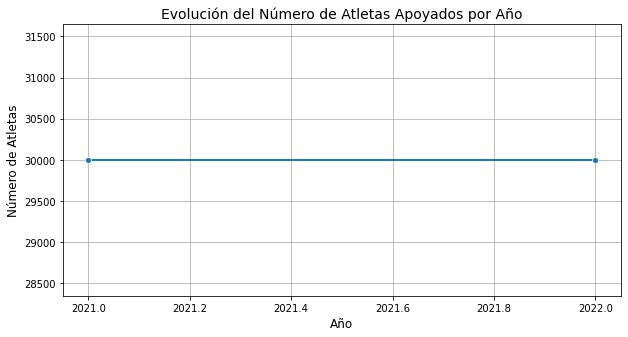

In [64]:
# Configurar el gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(data=atletas_por_anio, x="Año", y="total_atletas", marker="o", linewidth=2)

# Personalizar la visualización
plt.title("Evolución del Número de Atletas Apoyados por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Atletas", fontsize=12)
plt.grid(True)
plt.show()

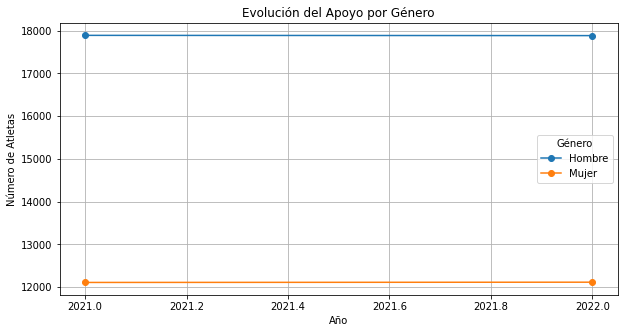

In [65]:
# Contar el número de atletas por año por sexo
df.groupby(["Año", "sexo"])["ID"].count().unstack().plot(kind="line", marker="o", figsize=(10, 5))
plt.title("Evolución del Apoyo por Género")
plt.xlabel("Año")
plt.ylabel("Número de Atletas")
plt.legend(title="Género")
plt.grid(True)
plt.show()

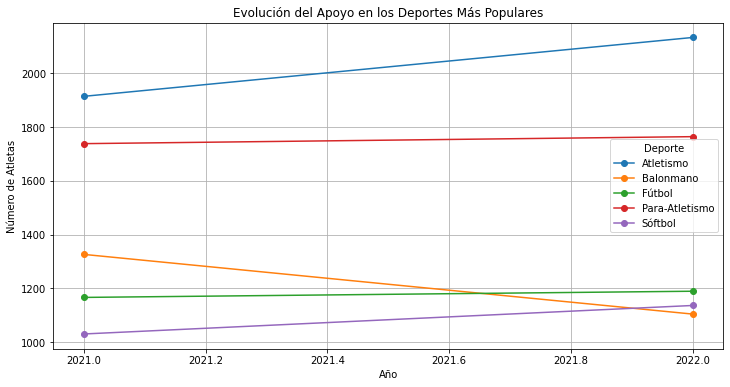

In [66]:
# Evolución en deportes mas populares

deportes_top = df["Deporte"].value_counts().head(5).index
df_filtrado = df[df["Deporte"].isin(deportes_top)]
df_filtrado.groupby(["Año", "Deporte"])["ID"].count().unstack().plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Evolución del Apoyo en los Deportes Más Populares")
plt.xlabel("Año")
plt.ylabel("Número de Atletas")
plt.legend(title="Deporte")
plt.grid(True)
plt.show()

## ¿Existen meses con más apoyo que otros?


In [67]:
# Contar el número de atletas por mes
atletas_por_mes = df.groupby("Mes")["ID"].count().reset_index()

# Renombrar columna para mayor claridad
atletas_por_mes.rename(columns={"ID": "total_atletas"}, inplace=True)

# Ordenar los meses en el orden correcto (1 a 12)
atletas_por_mes = atletas_por_mes.sort_values("Mes")

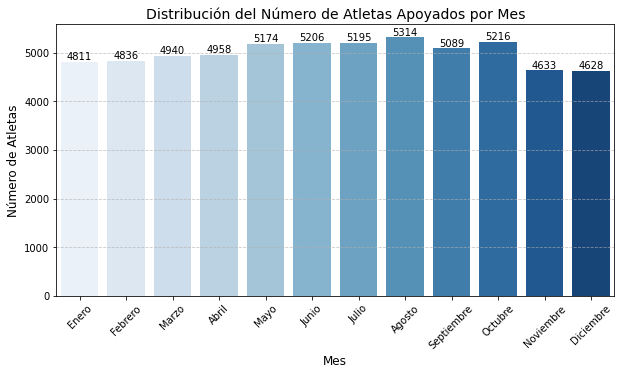

In [68]:
# Configurar el gráfico
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=atletas_por_mes, x="Mes", y="total_atletas", palette="Blues")

# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Personalizar la visualización
plt.title("Distribución del Número de Atletas Apoyados por Mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Número de Atletas", fontsize=12)
plt.xticks(ticks=range(12), labels=[
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

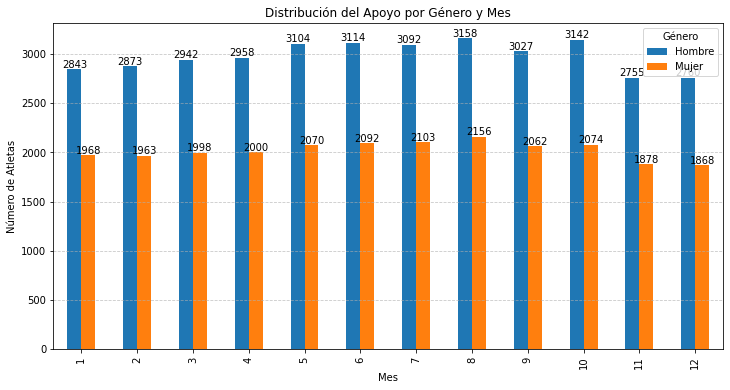

In [69]:
ax = df.groupby(["Mes", "sexo"])["ID"].count().unstack().plot(kind="bar", figsize=(12, 6))
plt.title("Distribución del Apoyo por Género y Mes")
plt.xlabel("Mes")
plt.ylabel("Número de Atletas")
plt.legend(title="Género")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

Podría haber una estacionalidad en el apoyo, con picos en meses centrales (mayo a julio) y disminuciones hacia el final del año (noviembre y diciembre).
Esto podría estar relacionado con los ciclos de competencias o asignación presupuestaria.

# 4. Distribución Geográfica

In [70]:
# Número de atletas por subregión
atletas_por_subregion = df.groupby("Subregión_nacimiento")["ID"].count().reset_index()
atletas_por_subregion.rename(columns={"ID": "total_atletas"}, inplace=True)

# Número de atletas por municipio
atletas_por_municipio = df.groupby("Municipio_nacimiento")["ID"].count().reset_index()
atletas_por_municipio.rename(columns={"ID": "total_atletas"}, inplace=True)


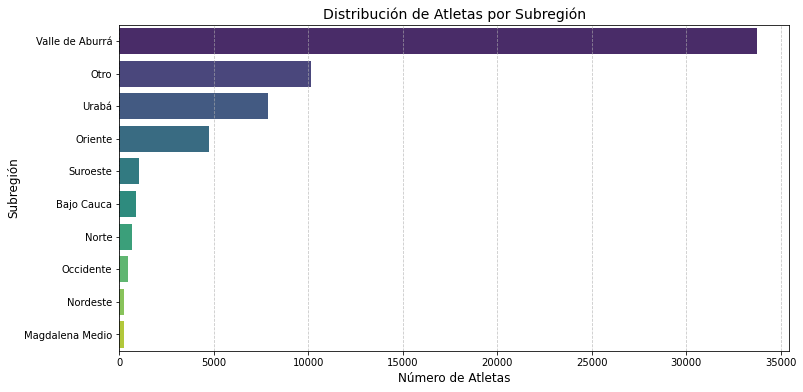

In [71]:
# Subregiones con más atletas
top_subregiones = atletas_por_subregion.sort_values("total_atletas", ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_subregiones, x="total_atletas", y="Subregión_nacimiento", palette="viridis")
plt.title("Distribución de Atletas por Subregión", fontsize=14)
plt.xlabel("Número de Atletas", fontsize=12)
plt.ylabel("Subregión", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


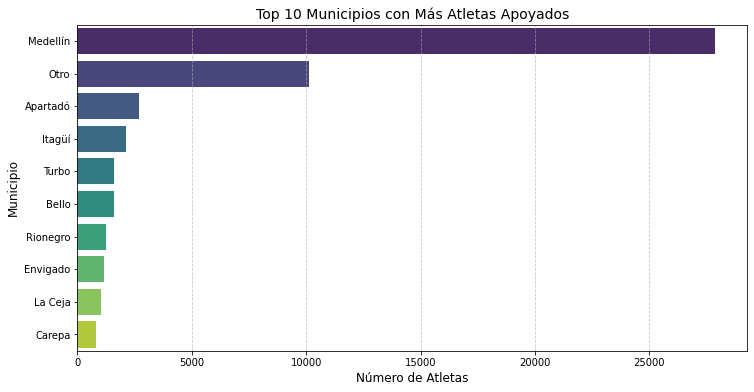

In [72]:
# Municipios con más atletas
top_municipios = atletas_por_municipio.sort_values("total_atletas", ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_municipios, x="total_atletas", y="Municipio_nacimiento", palette="viridis")
plt.title("Top 10 Municipios con Más Atletas Apoyados", fontsize=14)
plt.xlabel("Número de Atletas", fontsize=12)
plt.ylabel("Municipio", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [88]:
# Cargar el archivo de shapes de Antioquia
shapefile_path = "..\\data\\raw\\shapes.shp"  # Reemplaza con la ruta correcta
mapa_antioquia = gpd.read_file(shapefile_path)

# Asegúrate de que los nombres de los municipios coincidan con los del dataset
# Ejemplo: columna en el shapefile = "municipio_name"
print(mapa_antioquia.columns)  # Print columns to find the correct name


Index(['geometry'], dtype='object')


In [101]:
# Cargar el archivo GeoJSON o Shape
shapefile_path = "..\\data\\raw\\shapes.shp"  # Reemplaza con tu archivo
mapa_antioquia = gpd.read_file(shapefile_path)

# Extraer atributos desde la columna geometry (si los datos están incrustados)
# Convertir a JSON para extraer propiedades
geojson_data = json.loads(mapa_antioquia.to_json())

geojson_data['features'][0]

# Extraer propiedades de cada feature en el GeoJSON
#atributos = [features["properties"] for feature in geojson_data["features"]]

# Crear un DataFrame con los atributos
#atributos_df = pd.DataFrame(atributos)

# Mostrar columnas disponibles
#print("Columnas disponibles en los atributos:", atributos_df.columns)




{'id': '0',
 'type': 'Feature',
 'properties': {},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-77.21360015870256, 7.900499820708228],
    [-77.182502746593, 7.885900020598448],
    [-77.17040252686637, 7.88640022277743],
    [-77.15480041504986, 7.88579988479529],
    [-77.13639831544037, 7.885700225829269],
    [-77.1288986206161, 7.883399963378112],
    [-77.10990142823314, 7.876399993895734],
    [-77.09950256348696, 7.864200115203127],
    [-77.09950256348695, 7.857299804686772],
    [-77.1087036132917, 7.848599910735336],
    [-77.11560058594797, 7.834199905394748],
    [-77.12539672852617, 7.831399917601762],
    [-77.13639831544032, 7.834899902342944],
    [-77.149002075206, 7.822199821471336],
    [-77.13289642335039, 7.795000076293153],
    [-77.11499786377993, 7.766600131987773],
    [-77.10169982911184, 7.740600109099621],
    [-77.08850097657267, 7.729000091552041],
    [-77.06770324708033, 7.714499950408282],
    [-77.03829956055665, 7.690700054168103],
    [-77.

In [ ]:
# Combinar con el dataset de atletas
atributos_df = atributos_df.rename(columns={"nombre_columna_municipio": "nombre_mpi"})  # Reemplazar con el nombre real
atributos_df = atributos_df.merge(
    atletas_por_municipio,  # DataFrame con los datos de los atletas
    left_on="nombre_mpi",  # Cambiar a la columna correcta
    right_on="Municipio_nacimiento",
    how="left"
)

# Llenar NaN con 0 para municipios sin datos
atributos_df["total_atletas"] = atributos_df["total_atletas"].fillna(0)

# Crear un nuevo GeoJSON con los datos combinados
for feature in geojson_data["features"]:
    municipio_name = feature["properties"]["nombre_columna_municipio"]  # Cambiar por el atributo real
    if municipio_name in atributos_df["nombre_mpi"].values:
        total_atletas = atributos_df.loc[atributos_df["nombre_mpi"] == municipio_name, "total_atletas"].values[0]
        feature["properties"]["total_atletas"] = total_atletas
    else:
        feature["properties"]["total_atletas"] = 0

# Crear el mapa base centrado en Antioquia
m = folium.Map(location=[6.5, -75.5], zoom_start=7)

# Agregar un coropleta para visualizar el apoyo por municipio
folium.Choropleth(
    geo_data=geojson_data,
    data=atributos_df,
    columns=["nombre_mpi", "total_atletas"],
    key_on="feature.properties.nombre_columna_municipio",  # Cambiar por el atributo real
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Número de Atletas por Municipio"
).add_to(m)

# Agregar información adicional con popups (opcional)
for feature in geojson_data["features"]:
    centroide = feature["geometry"]["coordinates"]
    nombre_municipio = feature["properties"]["nombre_columna_municipio"]  # Cambiar por el atributo real
    total_atletas = feature["properties"]["total_atletas"]
    folium.Marker(
        location=[centroide[1], centroide[0]],  # Cambiar según estructura del GeoJSON
        popup=f"{nombre_municipio}: {int(total_atletas)} atletas"
    ).add_to(m)

# Guardar el mapa como archivo HTML
m.save("mapa_antioquia.html")

print("¡Mapa creado! Ábrelo en tu navegador desde el archivo mapa_antioquia.html")